# UK E-Commerce Analysis

## Preprocessing

### Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importing the dataset and exploring the data

In [ ]:
dataset = pd.read_csv('data.csv', encoding_errors='ignore')
dataset.shape

(541909, 8)

In [ ]:
dataset.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
dataset.duplicated().sum()

5268

### Cleaning the data and adjusting data types

#### Removing duplicates

In [ ]:
dataset.drop_duplicates(keep='first', inplace=True)
print(dataset.shape)
print(dataset.info())

(536641, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB
None


#### Filling Nan values

In [ ]:
dataset['Description'] = dataset['Description'].fillna('Unknown')
dataset['CustomerID'] = dataset['CustomerID'].fillna(0)

#### Changing data types where needed

In [ ]:
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


#### Handling negative values for Quantity and Price

In [ ]:
dataset[dataset['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0.0,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0.0,United Kingdom


In [ ]:
dataset['Description'].str.contains('debt', case=False).sum()

3

In [ ]:
dataset =  dataset[dataset['UnitPrice'] > 0]

In [ ]:
negative_quantity = dataset[dataset['Quantity'] < 0]
dataset = dataset[dataset['Quantity'] > 0]

#### Splitting InvoiceDate into separate columns

In [ ]:
dataset['Date'] = dataset['InvoiceDate'].dt.date
dataset['Time'] = dataset['InvoiceDate'].dt.time
dataset['Year'] = dataset['InvoiceDate'].dt.year
dataset['Month'] = dataset['InvoiceDate'].dt.month_name()
dataset['Day'] = dataset['InvoiceDate'].dt.day_name()

In [ ]:
dataset.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,December,Wednesday


#### Creating a total columns

In [ ]:
dataset['Total'] = dataset['Quantity'] * dataset['UnitPrice']

## Analysis

In [ ]:
dataset.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Year,Month,Day,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,December,Wednesday,15.3


#### Analysing the best month by revenues

In [ ]:
dataset_by_month = dataset.groupby(['Year', 'Month'], as_index=False).agg({'Total': pd.Series.sum})

In [ ]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']
dataset_by_month['Total Thousands'] = dataset_by_month['Total'] / 1000

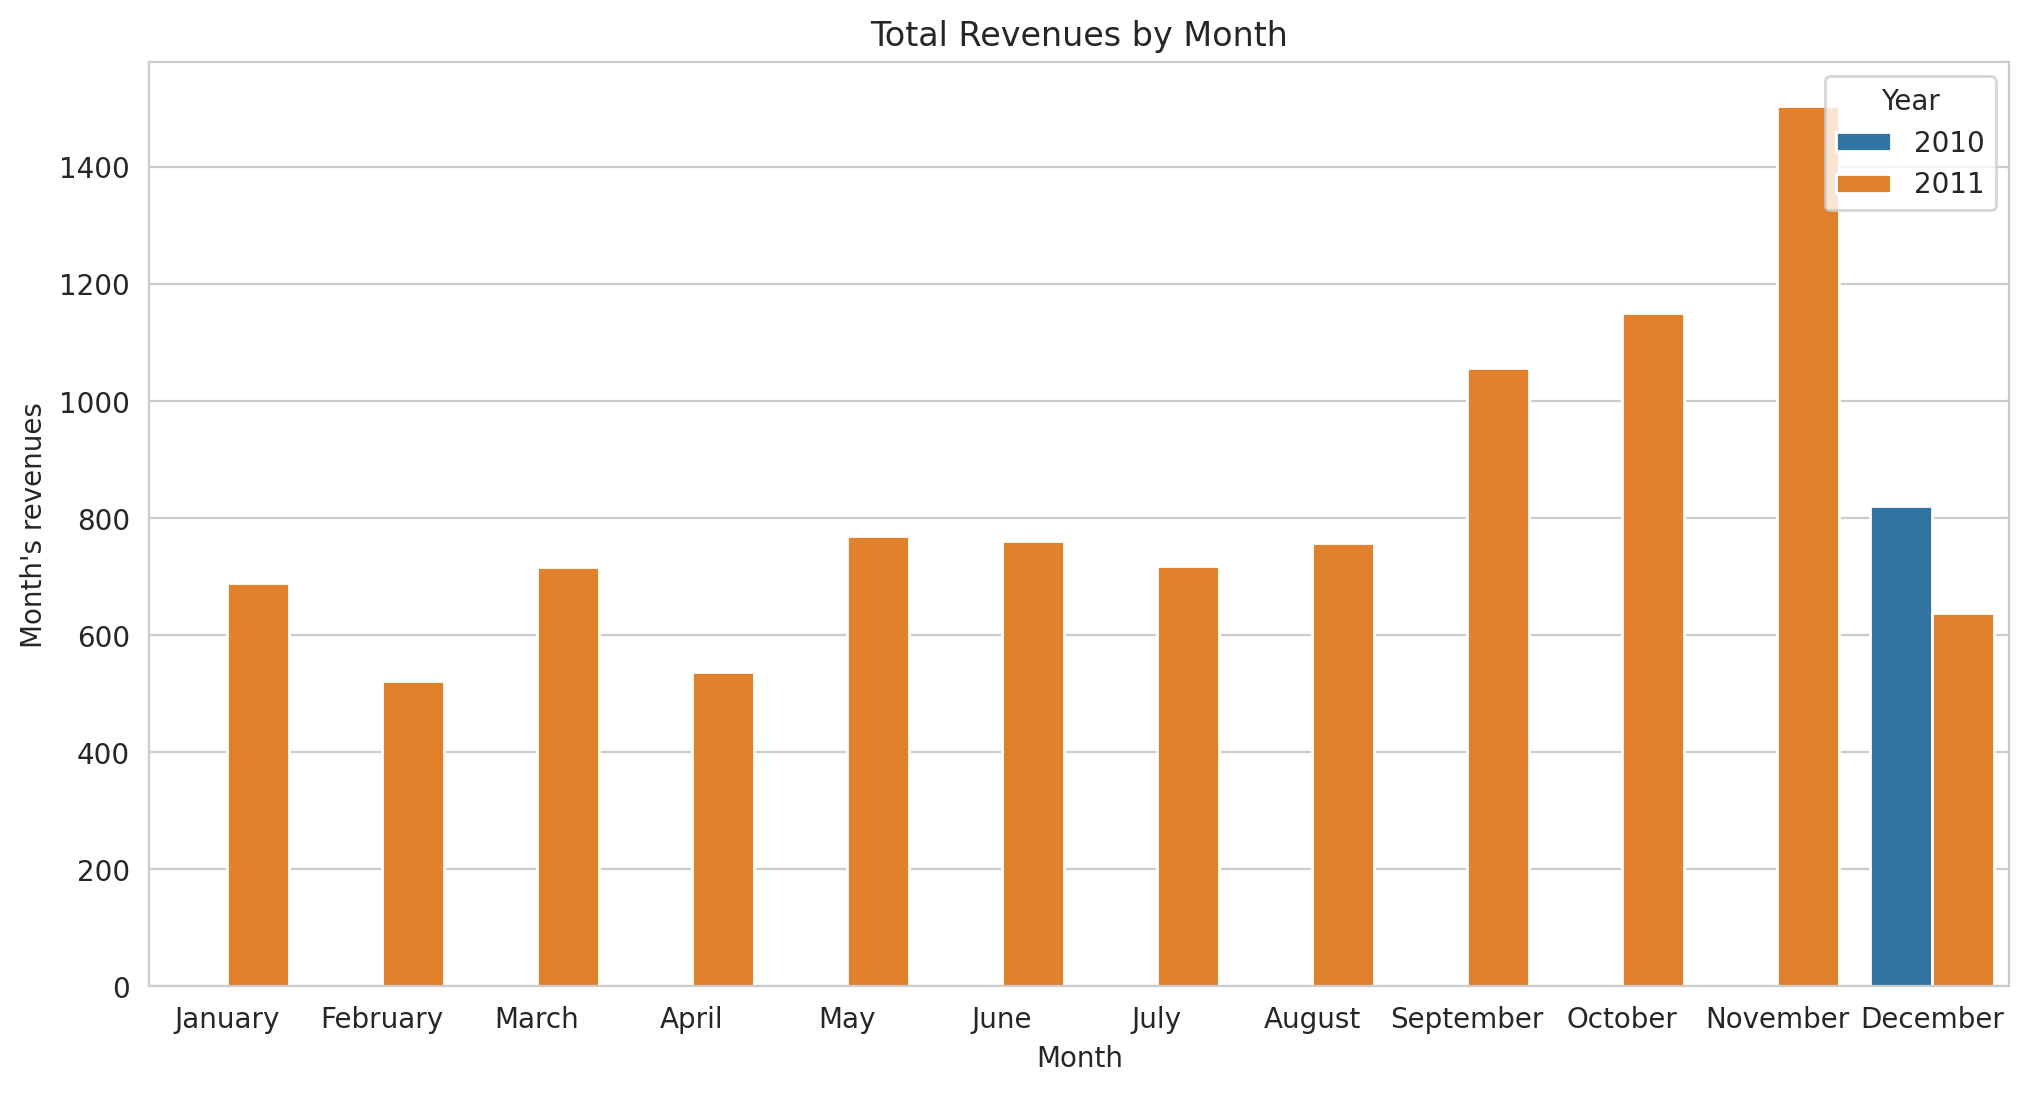

In [ ]:
plt.figure(figsize=(12, 6), dpi=200)
with sns.axes_style('whitegrid'):
  fig = sns.barplot(data=dataset_by_month,
                    x='Month',
                    y='Total Thousands',
                    hue='Year',
                    order=months_order)
  fig.set(ylabel="Month's revenues",
          title='Total Revenues by Month')
plt.show()

### Analysing Weekly and daily data

#### Weekly data analysis

In [ ]:
dataset_by_month_day = dataset.groupby(['Month', 'Day'], as_index=False).agg({'Total': pd.Series.sum})

In [ ]:
dataset_by_day = dataset_by_month_day.groupby(['Day'], as_index=False).agg({'Total': pd.Series.mean})

In [ ]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

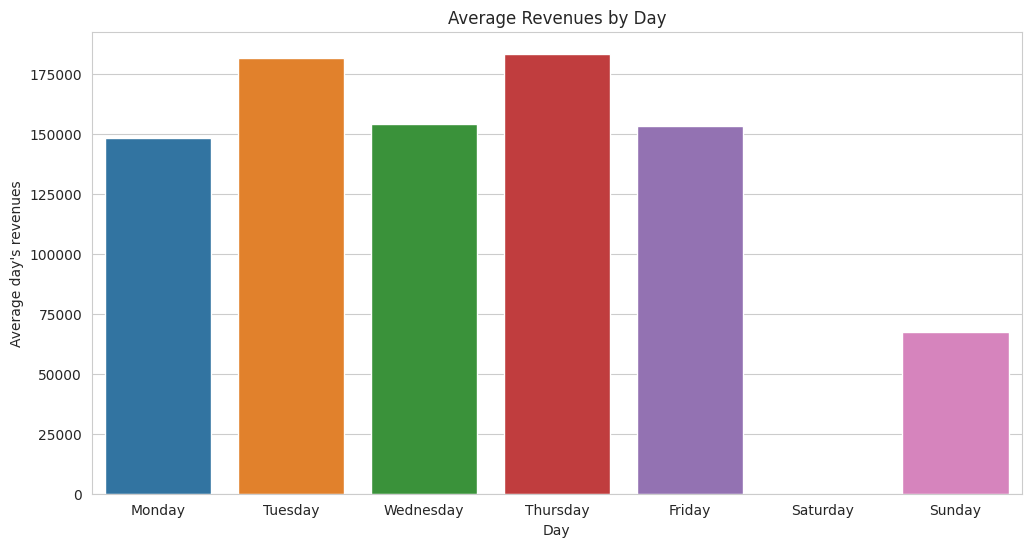

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
with sns.axes_style('whitegrid'):
  fig2 = sns.barplot(data=dataset_by_day,
                     x='Day',
                     y='Total',
                     order=days_order)
  fig2.set(ylabel="Average day's revenues",
           title='Average Revenues by Day')
plt.show()

#### Daily data analysis

In [ ]:
dataset['Hour'] = dataset['InvoiceDate'].dt.hour

In [ ]:
dataset_by_hour = dataset.groupby(['Hour'], as_index=False).agg({'InvoiceNo': pd.Series.count})

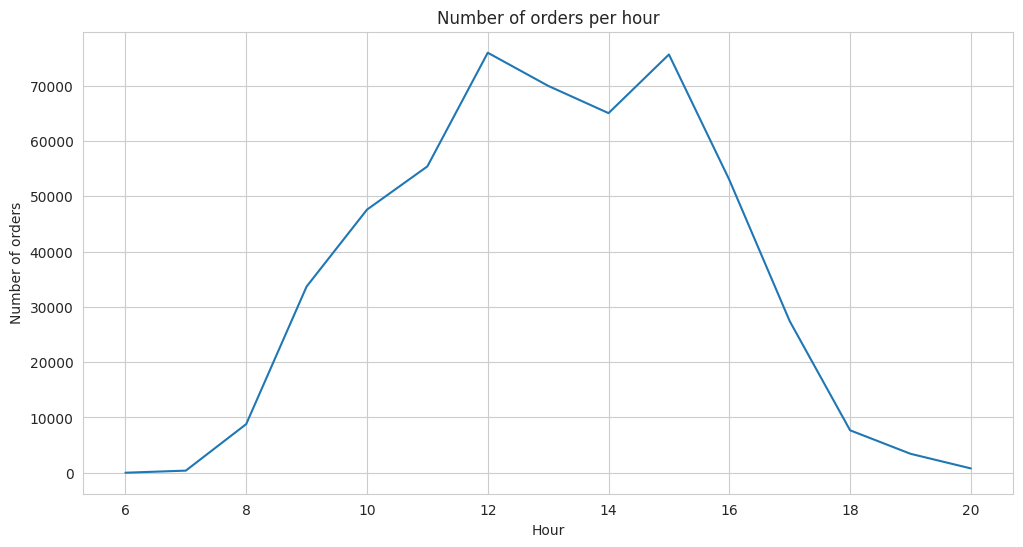

In [ ]:
plt.figure(figsize=(12,6), dpi=100)
with sns.axes_style('whitegrid'):
  fig3 = sns.lineplot(data=dataset_by_hour,
                      x='Hour',
                      y='InvoiceNo')
  fig3.set(xlabel='Hour',
           ylabel='Number of orders',
           title='Number of orders per hour')
plt.show()

### Analysing customers

#### Customers' countries

In [ ]:
dataset_country_orders = dataset.groupby(['Country'], as_index=False).agg({'InvoiceNo': pd.Series.count})
dataset_country_value = dataset.groupby(['Country'], as_index=False).agg({'Total': pd.Series.sum})

In [ ]:
import plotly.express as px

In [ ]:
# Uk makes around 91% of orders and around 85% of the orders value
# Therefor the focus of the analysis for this shifts on the relevance
# of other countries

In [ ]:
countries_no_uk_orders = dataset_country_orders[dataset_country_orders['Country'] != 'United Kingdom']
countries_no_uk_value = dataset_country_value[dataset_country_value['Country'] != 'United Kingdom']

In [ ]:
fig4 = px.pie(data_frame=countries_no_uk_orders,
              values='InvoiceNo',
              names='Country',
              title='Orders from each foreign country',
              width=800,
              height=600)
fig4.show()

In [ ]:
fig5 = px.pie(data_frame=countries_no_uk_value,
              values='Total',
              names='Country',
              title='Value of each foreign country',
              width=800,
              height=600)
fig5.show()

### Products analysis

In [ ]:
dataset_products = dataset.groupby(['Description'], as_index=False).agg({'InvoiceNo': pd.Series.count})

##### Top 100 most purchased products

In [ ]:
dataset_top_100 = dataset_products.sort_values(by='InvoiceNo', ascending=False).head(100)

In [ ]:
best_products = dataset_top_100['Description'].tolist()

In [ ]:
dataset_best_products = dataset[dataset['Description'].isin(best_products)]

In [ ]:
dataset_best_products.shape

(96791, 15)

##### Products bought together (Apriori)

In [96]:
frame = {'InvoiceNo': dataset_best_products['InvoiceNo'],
         'Description': dataset_best_products['Description']}
dataset_to_dummies = pd.DataFrame(frame)

In [97]:
dataset_to_dummies.set_index('InvoiceNo')
dataset_to_dummies.shape

(96791, 2)

In [109]:
dataset_to_apriori = pd.get_dummies(dataset_to_dummies['Description'])
dataset_to_apriori.shape

(96791, 100)

In [110]:
dataset_to_apriori['InvoiceNo'] = dataset_to_dummies['InvoiceNo']

In [111]:
dataset_apriori = dataset_to_apriori.groupby(['InvoiceNo'], as_index=False).agg('sum')

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=e6052db6a41862dc480c2d3f3ac83d02b92752e75f396f06d9992cccbc96ea29
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori

In [112]:
dataset_apriori = dataset_apriori.drop(['InvoiceNo'], axis=1)

In [114]:
columns_names = list(dataset_apriori.columns.values)

In [115]:
for column in columns_names:
  dataset_apriori[column] = np.where(dataset_apriori[column] == 1, column, np.NaN)

In [117]:
transactions = []
for i in range(0, dataset_apriori.shape[0]):
  transactions.append([str(dataset_apriori.values[i, j]) for j in range(0, dataset_apriori.shape[1])])

In [130]:
rules = apriori(transactions=transactions, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)

In [131]:
results = list(rules)
from pprint import pprint
pprint(results)

[RelationRecord(items=frozenset({'DOTCOM POSTAGE', '6 RIBBONS RUSTIC CHARM'}), support=0.012559845799912952, ordered_statistics=[OrderedStatistic(items_base=frozenset({'6 RIBBONS RUSTIC CHARM'}), items_add=frozenset({'DOTCOM POSTAGE'}), confidence=0.21443736730360932, lift=4.884980422583497), OrderedStatistic(items_base=frozenset({'DOTCOM POSTAGE'}), items_add=frozenset({'6 RIBBONS RUSTIC CHARM'}), confidence=0.28611898016997167, lift=4.884980422583497)]),
 RelationRecord(items=frozenset({'JAM MAKING SET PRINTED', '6 RIBBONS RUSTIC CHARM'}), support=0.01442516943356339, ordered_statistics=[OrderedStatistic(items_base=frozenset({'6 RIBBONS RUSTIC CHARM'}), items_add=frozenset({'JAM MAKING SET PRINTED'}), confidence=0.2462845010615711, lift=3.414649681528662), OrderedStatistic(items_base=frozenset({'JAM MAKING SET PRINTED'}), items_add=frozenset({'6 RIBBONS RUSTIC CHARM'}), confidence=0.2, lift=3.414649681528662)]),
 RelationRecord(items=frozenset({'JAM MAKING SET WITH JARS', '6 RIBBONS 

In [132]:
def inspect(results):
  lhs = [tuple(result[2][0][0])[0] for result in results]
  rhs = [tuple(result[2][0][1])[0] for result in results]
  supports = [result[1] for result in results]
  confidences = [result[2][0][2] for result in results]
  lifts = [result[2][0][3] for result in results]
  return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns=['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [123]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,6 RIBBONS RUSTIC CHARM,DOTCOM POSTAGE,0.012560,0.214437,4.884980
1,6 RIBBONS RUSTIC CHARM,JAM MAKING SET PRINTED,0.014425,0.246285,3.414650
2,6 RIBBONS RUSTIC CHARM,JAM MAKING SET WITH JARS,0.012684,0.216561,3.079525
3,6 RIBBONS RUSTIC CHARM,PACK OF 72 RETROSPOT CAKE CASES,0.014363,0.245223,3.062050
4,6 RIBBONS RUSTIC CHARM,RECIPE BOX PANTRY YELLOW DESIGN,0.012746,0.217622,3.173179
...,...,...,...,...,...
29458,WHITE HANGING HEART T-LIGHT HOLDER,WOODEN PICTURE FRAME WHITE FINISH,0.003109,0.268817,3.951908
29459,WOOD BLACK BOARD ANT WHITE FINISH,WOODEN PICTURE FRAME WHITE FINISH,0.005907,0.633333,9.310695
29460,WOOD BLACK BOARD ANT WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,0.009327,0.218978,3.653345
29461,WOOD BLACK BOARD ANT WHITE FINISH,WOODEN PICTURE FRAME WHITE FINISH,0.011192,0.262774,3.863062


In [133]:
resultsinDataFrame.nlargest(n=10, columns='Lift') # sorts by the columns

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
167,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,0.038799,0.621514,13.117859
154,GARDENERS KNEELING PAD CUP OF TEA,GARDENERS KNEELING PAD KEEP CALM,0.033327,0.714667,12.686517
494,PINK REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,0.036747,0.775591,11.790003
172,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,0.046882,0.750996,11.416133
102,DOLLY GIRL LUNCH BOX,SPACEBOY LUNCH BOX,0.032954,0.629454,11.311177
52,CHARLOTTE BAG PINK POLKADOT,STRAWBERRY CHARLOTTE BAG,0.022881,0.504801,11.307404
50,CHARLOTTE BAG PINK POLKADOT,RED RETROSPOT CHARLOTTE BAG,0.031337,0.691358,10.890412
545,STRAWBERRY CHARLOTTE BAG,WOODLAND CHARLOTTE BAG,0.024871,0.557103,10.847323
537,SET OF 3 BUTTERFLY COOKIE CUTTERS,SET OF 3 HEART COOKIE CUTTERS,0.018964,0.447214,10.608472
526,RED RETROSPOT CHARLOTTE BAG,STRAWBERRY CHARLOTTE BAG,0.029783,0.469148,10.508782
